In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
matplotlib.style.use('ggplot')
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')
data.shape

(6000, 39)

In [3]:
X = data.drop('Grant.Status', 1)
y = data['Grant.Status']

###  Посмотрим на данные

In [4]:
data.head()

,Grant.Status,Sponsor.Code,Grant.Category.Code,Contract.Value.Band...see.note.A,RFCD.Code.1,RFCD.Percentage.1,RFCD.Code.2,RFCD.Percentage.2,RFCD.Code.3,RFCD.Percentage.3,...,Dept.No..1,Faculty.No..1,With.PHD.1,No..of.Years.in.Uni.at.Time.of.Grant.1,Number.of.Successful.Grant.1,Number.of.Unsuccessful.Grant.1,A..1,A.1,B.1,C.1
0,1,21A,50A,A,230202.0,50.0,230203.0,30.0,230204.0,20.0,...,3098.0,31.0,Yes,>=0 to 5,2.0,0.0,0.0,4.0,2.0,0.0
1,1,4D,10A,D,320801.0,100.0,0.0,0.0,0.0,0.0,...,2553.0,25.0,Yes,>=0 to 5,3.0,1.0,0.0,2.0,0.0,0.0
2,0,NaN,NaN,NaN,320602.0,50.0,321004.0,30.0,321015.0,20.0,...,2813.0,25.0,NaN,Less than 0,1.0,5.0,0.0,7.0,2.0,0.0
3,0,51C,20C,A,291503.0,60.0,321402.0,40.0,0.0,0.0,...,2553.0,25.0,NaN,more than 15,2.0,1.0,5.0,6.0,9.0,1.0
4,0,24D,30B,NaN,380107.0,100.0,0.0,0.0,0.0,0.0,...,2923.0,25.0,NaN,Less than 0,0.0,2.0,0.0,0.0,0.0,0.0


###  Разделим список столбцов по категориям

In [5]:
numeric_cols = ['RFCD.Percentage.1', 'RFCD.Percentage.2', 'RFCD.Percentage.3', 
                'RFCD.Percentage.4', 'RFCD.Percentage.5',
                'SEO.Percentage.1', 'SEO.Percentage.2', 'SEO.Percentage.3',
                'SEO.Percentage.4', 'SEO.Percentage.5',
                'Year.of.Birth.1', 'Number.of.Successful.Grant.1', 'Number.of.Unsuccessful.Grant.1']
categorical_cols = list(set(X.columns.values.tolist()) - set(numeric_cols))

### 0. Обработка пропущенных значений

In [6]:
## ВЫЧИСЛЕНИЕ СРЕДНИХ ПО СТОЛБЦАМ

def calculate_means(numeric_data):
    means = np.zeros(numeric_data.shape[1])
    for j in range(numeric_data.shape[1]):
        to_sum = numeric_data.iloc[:,j]
        indices = np.nonzero(~numeric_data.iloc[:,j].isnull())[0]
        
        correction = np.amax(to_sum[indices])
        to_sum /= correction
        for i in indices:
            means[j] += to_sum[i]
        means[j] /= indices.size
        means[j] *= correction
    return pd.Series(means, numeric_data.columns)

In [7]:
## ВЫЧИСЛЕНИЕ СРЕДНИХ
X_means = calculate_means(X[numeric_cols])
X_means

RFCD.Percentage.1                   74.832348
RFCD.Percentage.2                   17.677593
RFCD.Percentage.3                    6.933011
RFCD.Percentage.4                    0.437937
RFCD.Percentage.5                    0.119112
SEO.Percentage.1                    71.483240
SEO.Percentage.2                    20.646880
SEO.Percentage.3                     6.926704
SEO.Percentage.4                     0.730804
SEO.Percentage.5                     0.212192
Year.of.Birth.1                   1962.449849
Number.of.Successful.Grant.1         1.177849
Number.of.Unsuccessful.Grant.1       2.097977
dtype: float64

In [8]:
X_real_zeros = X[numeric_cols]
X_real_zeros_1 = X_real_zeros.fillna(value=0.0, inplace=False)

In [9]:
import sys

In [13]:
sys.getsizeof(X_real_mean) #проверяем не пустой ли массив

624096

In [11]:
type(X_real_zeros_1)

pandas.core.frame.DataFrame

In [12]:
X_real_mean = X[numeric_cols]
for colname, ser in X_real_mean.iteritems():
    X_real_mean.loc[0:, colname].fillna(value= X_means[colname], inplace=True)

In [14]:
# ЗАПОЛНЯЕМ ПРОПУСКИ В КАТЕГОРИАЛЬНЫХ СТОЛБЦАХ
X_cat = X[categorical_cols]
X_cat.fillna(value="N/A", inplace=True)

E:\Anaconda\lib\site-packages\pandas\core\frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [15]:
# ПРЕОБРАЗОВАНИЕ ВСЕХ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ В СТРОКИ
X_cat_1 = X_cat.astype(dtype = 'str', copy=False, errors='raise')

In [16]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.feature_extraction import DictVectorizer as DV

categorial_data = pd.DataFrame({'sex': ['male', 'female', 'male', 'female'], 
                                'nationality': ['American', 'European', 'Asian', 'European']})
print('Исходные данные:\n')
print(categorial_data)
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(categorial_data.T.to_dict().values())
print('\nЗакодированные данные:\n')
print(encoded_data)

Исходные данные:

  nationality     sex
0    American    male
1    European  female
2       Asian    male
3    European  female

Закодированные данные:

[[ 1.  0.  0.  0.  1.]
 [ 0.  0.  1.  1.  0.]
 [ 0.  1.  0.  0.  1.]
 [ 0.  0.  1.  1.  0.]]


In [17]:
# ЭКЗЕМПЛЯР DictVectorizer 
encoder = DV(sparse = False)
X_cat_oh = encoder.fit_transform(X_cat_1.T.to_dict().values())

# X_cat_1.T   <<<-- ТРАНСПОНИРОВАТЬ

##  Разделение выборки на обучение и тест

In [18]:
from sklearn.model_selection import train_test_split

(X_train_real_zeros, 
 X_test_real_zeros, 
 y_train, y_test) = train_test_split(X_real_zeros_1, y, 
                                     test_size=0.3, 
                                     random_state=0)
(X_train_real_mean, 
 X_test_real_mean) = train_test_split(X_real_mean, 
                                      test_size=0.3, 
                                      random_state=0)
(X_train_cat_oh,
 X_test_cat_oh) = train_test_split(X_cat_oh, 
                                   test_size=0.3, 
                                   random_state=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score

def plot_scores(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def write_answer_1(auc_1, auc_2):
    auc = (auc_1 + auc_2)/2
    print auc
    with open("preprocessing_lr_answer1.txt", "w") as fout:
        fout.write(str(auc))
        
param_grid = {'C': [0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
cv = 3

E:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
E:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Объединение выборок

In [20]:
X_united_zeros = np.hstack((X_train_real_zeros, X_train_cat_oh))
X_united_mean = np.hstack((X_train_real_mean, X_train_cat_oh))
X_united_test_zeros = np.hstack((X_test_real_zeros, X_test_cat_oh))
X_united_test_mean = np.hstack((X_test_real_mean, X_test_cat_oh))

In [21]:
estimator = LogisticRegression(penalty='l2')

### Обучение модели без подбора параметров

In [22]:
%%time
no_grid_z = estimator.fit(X_united_zeros, y_train)
no_grid_m = estimator.fit(X_united_mean, y_train)

Wall time: 2.14 s


### Подбор мараметров по сетке

In [23]:
grid_cv = GridSearchCV(estimator, param_grid, scoring = 'accuracy', cv = 3)

###  Обучение

In [24]:
%%time
with_zeros = grid_cv.fit(X_united_zeros, y_train)
with_means = grid_cv.fit(X_united_mean, y_train)

Wall time: 15.5 s


In [25]:
print with_zeros.best_score_
print with_means.best_score_

0.794285714286
0.794285714286


In [26]:
with_zeros.grid_scores_

[mean: 0.78238, std: 0.00838, params: {'C': 0.01},
 mean: 0.79429, std: 0.01566, params: {'C': 0.05},
 mean: 0.79333, std: 0.01578, params: {'C': 0.1},
 mean: 0.78976, std: 0.01368, params: {'C': 0.5},
 mean: 0.78762, std: 0.01232, params: {'C': 1},
 mean: 0.77738, std: 0.01076, params: {'C': 5},
 mean: 0.77310, std: 0.01247, params: {'C': 10}]

In [27]:
with_means.grid_scores_

[mean: 0.78238, std: 0.00838, params: {'C': 0.01},
 mean: 0.79429, std: 0.01566, params: {'C': 0.05},
 mean: 0.79333, std: 0.01578, params: {'C': 0.1},
 mean: 0.78976, std: 0.01368, params: {'C': 0.5},
 mean: 0.78762, std: 0.01232, params: {'C': 1},
 mean: 0.77738, std: 0.01076, params: {'C': 5},
 mean: 0.77310, std: 0.01247, params: {'C': 10}]

### PREDICTIONS

In [28]:
y_scores_z = with_zeros.predict(X_united_zeros)

In [29]:
print y_scores_z

[1 0 0 ..., 0 1 1]


In [30]:
y_scores_m = with_means.predict(X_united_mean)

In [31]:
y_scores_m

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

### ROC_AUC SCORE

In [32]:
roc_auc_score(y_train, y_scores_z)

0.7718584645171227

In [33]:
roc_auc_score(y_train, y_scores_m)

0.82620760590959597

### Ответ №1

In [34]:
write_answer_1(roc_auc_score(y_train, y_scores_m), roc_auc_score(y_train, y_scores_z))

0.799033035213


###  Масштабирование данных

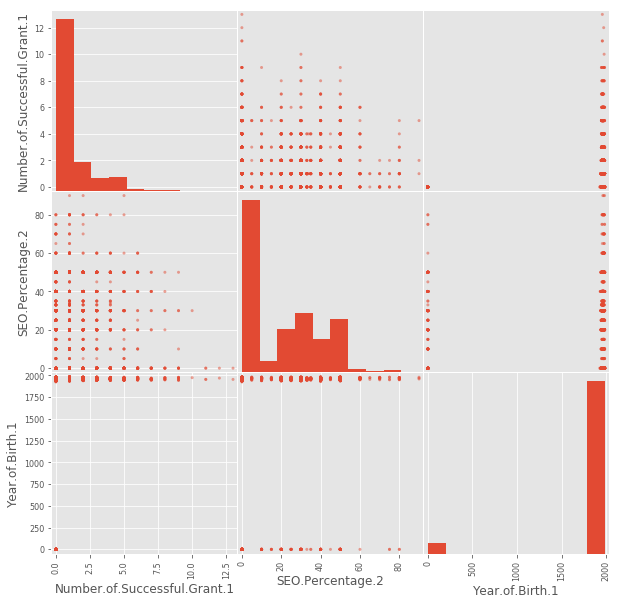

In [35]:
from pandas.plotting import scatter_matrix

data_numeric = pd.DataFrame(X_train_real_zeros, columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 'SEO.Percentage.2', 'Year.of.Birth.1']
scatter_matrix(data_numeric[list_cols], alpha=0.5, figsize=(10, 10))
plt.show()

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
scaler = StandardScaler()

X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros)

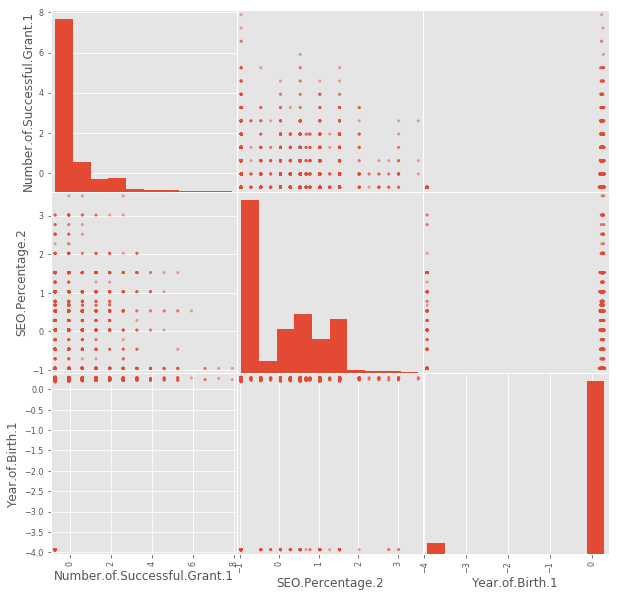

In [38]:
data_numeric_scaled = pd.DataFrame(X_train_real_scaled, 
                                   columns=numeric_cols)
list_cols = ['Number.of.Successful.Grant.1', 
             'SEO.Percentage.2', 
             'Year.of.Birth.1']
scatter_matrix(data_numeric_scaled[list_cols], 
               alpha=0.5, figsize=(10, 10))
plt.show()

### Задание №2

In [39]:
def write_answer_2(auc):
    print auc
    with open("preprocessing_lr_answer2.txt", "w") as fout:
        fout.write(str(auc))

In [40]:
X_united_train_scaled = np.hstack((X_train_real_scaled, X_train_cat_oh))

In [41]:
%%time
with_zeros_scaled = grid_cv.fit(X_united_train_scaled, y_train)

Wall time: 5.11 s


In [42]:
y_scores_scaled_zeros = with_zeros_scaled.predict(X_united_train_scaled)

In [43]:
X_test_real_scaled_united = np.hstack((X_test_real_scaled, X_test_cat_oh))

In [44]:
y_scores_scaled_zeros_test = with_zeros_scaled.predict(X_test_real_scaled_united)

In [45]:
roc_auc_score(y_train, y_scores_scaled_zeros)

0.82854663762472092

In [46]:
roc_auc_score(y_test, y_scores_scaled_zeros_test)

0.80585373278013639

###  Ответ №2

In [47]:
write_answer_2(roc_auc_score(y_test, y_scores_scaled_zeros_test))

0.80585373278


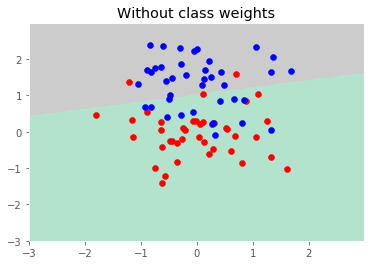

AUC: 0.906667


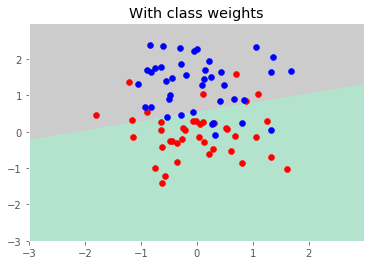

AUC: 0.895000


In [48]:
np.random.seed(0)
"""Сэмплируем данные из первой гауссианы"""
data_0 = np.random.multivariate_normal([0,0], [[0.5,0],[0,0.5]], size=40)
"""И из второй"""
data_1 = np.random.multivariate_normal([0,1], [[0.5,0],[0,0.5]], size=40)
"""На обучение берём 20 объектов из первого класса и 10 из второго"""
example_data_train = np.vstack([data_0[:20,:], data_1[:10,:]])
example_labels_train = np.concatenate([np.zeros((20)), np.ones((10))])
"""На тест - 20 из первого и 30 из второго"""
example_data_test = np.vstack([data_0[20:,:], data_1[10:,:]])
example_labels_test = np.concatenate([np.zeros((20)), np.ones((30))])
"""Задаём координатную сетку, на которой будем вычислять область классификации"""
xx, yy = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
"""Обучаем регрессию без балансировки по классам"""
optimizer = GridSearchCV(LogisticRegression(), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
"""Строим предсказания регрессии для сетки"""
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
"""Считаем AUC"""
auc_wo_class_weights = roc_auc_score(example_labels_test, 
                                     optimizer.predict_proba(example_data_test)[:,1])
plt.title('Without class weights')
plt.show()
print('AUC: %f'%auc_wo_class_weights)
"""Для второй регрессии в LogisticRegression передаём параметр class_weight='balanced'"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train, example_labels_train)
Z = optimizer.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
auc_w_class_weights = roc_auc_score(example_labels_test, 
                                    optimizer.predict_proba(example_data_test)[:,1])
plt.title('With class weights')
plt.show()
print('AUC: %f'%auc_w_class_weights)

In [49]:
print(np.sum(y_train==0))
print(np.sum(y_train==1))

2316
1884


###  3. Балансировка классов.

In [50]:
def write_answer_3(auc_1, auc_2):
    auc = (auc_1 + auc_2) / 2
    print auc
    with open("preprocessing_lr_answer3.txt", "w") as fout:
        fout.write(str(auc))

In [51]:
estimator_weighted = LogisticRegression(penalty='l2', class_weight='balanced')

In [52]:
grid_cv_weighted = GridSearchCV(estimator_weighted, param_grid, scoring = 'accuracy', cv = cv)

In [53]:
fitted_weighted = grid_cv_weighted.fit(X_united_train_scaled, y_train)

In [54]:
y_scores_scaled_zeros_test_weighted = fitted_weighted.predict(X_test_real_scaled_united)

In [55]:
roc_auc_score(y_test, y_scores_scaled_zeros_test_weighted)

0.80829758300119658

In [56]:
np.random.seed(0)

In [57]:
X_united_train_scaled.shape

(4200L, 5606L)

In [58]:
indices_to_add = np.random.randint(0, high=1883, size=int(2316-1884))

In [59]:
indices_to_add

array([ 684,  559, 1653, 1216,  835,  763, 1731, 1383, 1033, 1747,  277,
       1778, 1828,  599, 1094, 1496,  600, 1420,  314,  705, 1510,  551,
         87,  174, 1624,  849, 1701,  537,  845,   72,  777,  115,  976,
        755, 1733, 1871, 1455,  448,  850,   99, 1201,  755,  797,  659,
       1171,  910,  423, 1312, 1289,  697,  639,  544,  543,  714,  244,
        151,  675,  510, 1483,  882, 1207,   28,  802,  128,  128, 1077,
       1574, 1512,  756,  273,  335,  388, 1641, 1066, 1466,  543,  888,
        257, 1345,   57,  291, 1143,  779,  430, 1106,   91,  398,  611,
       1589,  908,  633,   84,  203,  324,  774,  964, 1071,  639, 1155,
        972,  868, 1204, 1870, 1167, 1684, 1251,  954,  791,  719,  909,
        373, 1877,  560, 1329, 1605,  169, 1699, 1472, 1119, 1221, 1630,
        256, 1714, 1316,  816,  387, 1634, 1578,  973,  368,  917,  201,
        383, 1536,  370,  555,  954, 1407,   23, 1723,  130,  377,   98,
       1598,  931,  734,  123,  594,  739, 1172,  2

In [60]:
y_train.as_matrix() == 1

array([ True, False, False, ...,  True,  True,  True], dtype=bool)

In [61]:
X_train_to_add = X_united_train_scaled[y_train.as_matrix() == 1,:][indices_to_add,:]

In [62]:
X_train_to_add.shape

(432L, 5606L)

In [63]:
a = np.array([[1, 1, 1, 1, ], 
             [1, 1, 1, 1, ], 
             [1, 1, 1, 1, ], 
             [1, 1, 1, 1, ]])

b = np.array([[2, 2, 2, 2, ], 
             [2, 2, 2, 2, ], 
             [2, 2, 2, 2, ], 
             [2, 2, 2, 2, ]])

In [64]:
ab = np.vstack((a, b))
ab

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [2, 2, 2, 2],
       [2, 2, 2, 2],
       [2, 2, 2, 2],
       [2, 2, 2, 2]])

In [65]:
X_united_train_scaled_sampled = np.vstack((X_united_train_scaled, X_train_to_add))

In [66]:
ones = pd.DataFrame(np.ones(shape=int(2316-1884)))

In [67]:
y_train_sampled = pd.concat([y_train, ones])


In [68]:
%%time
hand_sampled = grid_cv.fit(X_united_train_scaled_sampled, y_train_sampled[0])

Wall time: 5.68 s


In [69]:
hand_sampled.predict(X_test_real_scaled_united)

array([ 1.,  0.,  0., ...,  0.,  0.,  0.])

In [70]:
roc_auc_score(y_test, 
              hand_sampled.predict(X_test_real_scaled_united))

0.81084042462361616

### Ответ №3

In [71]:
write_answer_3(roc_auc_score(y_test, 
                             y_scores_scaled_zeros_test_weighted), 
              roc_auc_score(y_test,
                            hand_sampled.predict(X_test_real_scaled_united)))

0.809569003812


###  4.  Стратификация выборки.

In [72]:
def write_answer_4(auc):
    print auc
    with open("preprocessing_lr_answer4.txt", "w") as fout:
        fout.write(str(auc))
        
# place your code here

In [73]:
(X_train_real_zeros, 
 X_test_real_zeros,
 y_train, y_test) = train_test_split(X_real_zeros_1, y, 
                                     test_size=0.3, 
                                     random_state=0, 
                                     stratify = y)
(X_train_cat_oh,
X_test_cat_oh) = train_test_split(X_cat_oh,
                                  test_size=0.3, 
                                     random_state=0, 
                                     stratify = y)

Масштабирование

In [74]:
X_train_real_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_scaled = scaler.transform(X_test_real_zeros)

Объединение выборок

In [75]:
X_train_real_scaled_united = np.hstack((X_train_real_scaled, X_train_cat_oh))

X_test_real_scaled_united = np.hstack((X_test_real_scaled, X_test_cat_oh))

Обучите классификатор и его гиперпараметры при помощи метода кросс-валидации, делая поправку на несбалансированные классы при помощи весов

In [76]:
strat_fitted = grid_cv_weighted.fit(X_train_real_scaled_united, y_train)

In [77]:
y_scores_strat = strat_fitted.predict(X_test_real_scaled_united)

Оцените качество классификатора метрике AUC ROC на тестовой выборке

In [78]:
roc_auc_score(y_test, y_scores_strat)

0.78859731613750683

### Ответ №4

In [79]:
write_answer_4(roc_auc_score(y_test, y_scores_strat))

0.788597316138


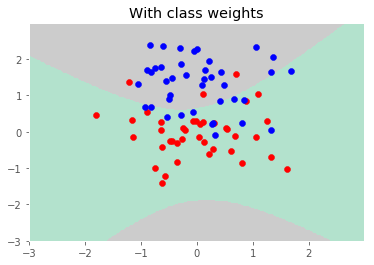

In [80]:
from sklearn.preprocessing import PolynomialFeatures

"""Инициализируем класс, который выполняет преобразование"""
transform = PolynomialFeatures(2) #2 - это порядок полинома
"""Обучаем преобразование на обучающей выборке, применяем его к тестовой"""
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
"""Обращаем внимание на параметр fit_intercept=False"""
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', 
                                            fit_intercept=False), 
                         param_grid, 
                         cv=cv, 
                         n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('With class weights')
plt.show()

In [81]:
print(example_data_train_poly.shape)

(30L, 6L)


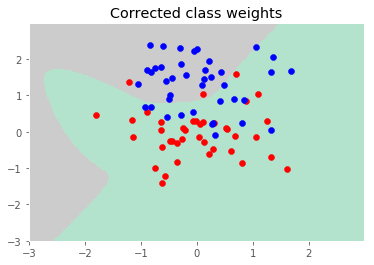

In [82]:
transform = PolynomialFeatures(11)
example_data_train_poly = transform.fit_transform(example_data_train)
example_data_test_poly = transform.transform(example_data_test)
optimizer = GridSearchCV(LogisticRegression(class_weight='balanced', fit_intercept=False), param_grid, cv=cv, n_jobs=-1)
optimizer.fit(example_data_train_poly, example_labels_train)
Z = optimizer.predict(transform.transform(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel2)
plt.scatter(data_0[:,0], data_0[:,1], color='red')
plt.scatter(data_1[:,0], data_1[:,1], color='blue')
plt.title('Corrected class weights')
plt.show()

In [83]:
print(example_data_train_poly.shape)

(30L, 78L)


### Преобразование вещественных признаков модели при помощи полиномиальных признаков степени 2

In [84]:
transform2 = PolynomialFeatures(2)

In [85]:
(X_train_real_zeros, 
 X_test_real_zeros,
 y_train, y_test) = train_test_split(X_real_zeros_1, y, 
                                     test_size=0.3, 
                                     random_state=0, 
                                     stratify = y)
(X_train_cat_oh,
X_test_cat_oh) = train_test_split(X_cat_oh,
                                  test_size=0.3, 
                                     random_state=0, 
                                     stratify = y)

In [86]:
X_train_real_poly = transform2.fit_transform(X_train_real_zeros)
X_test_real_poly = transform2.transform(X_test_real_zeros)

In [87]:
X_train_real_zeros.loc[0]

RFCD.Percentage.1                   50.0
RFCD.Percentage.2                   30.0
RFCD.Percentage.3                   20.0
RFCD.Percentage.4                    0.0
RFCD.Percentage.5                    0.0
SEO.Percentage.1                   100.0
SEO.Percentage.2                     0.0
SEO.Percentage.3                     0.0
SEO.Percentage.4                     0.0
SEO.Percentage.5                     0.0
Year.of.Birth.1                   1965.0
Number.of.Successful.Grant.1         2.0
Number.of.Unsuccessful.Grant.1       0.0
Name: 0, dtype: float64

Масштабирование

In [88]:
X_train_real_poly_scaled = scaler.fit_transform(X_train_real_zeros)
X_test_real_poly_scaled = scaler.transform(X_test_real_zeros)

Объединение выборок

In [89]:
X_train_real_poly_scaled_united = np.hstack((X_train_real_scaled, X_train_cat_oh))
X_test_real_poly_scaled_united = np.hstack((X_test_real_scaled, X_test_cat_oh))

Постройте логистическую регрессию на новых данных, одновременно подобрав оптимальные гиперпараметры. Обращаем внимание, что в преобразованных признаках уже присутствует столбец, все значения которого равны 1, поэтому обучать дополнительно значение  $b$  не нужно, его функцию выполняет один из весов  $w$ . В связи с этим во избежание линейной зависимости в датасете, в вызов класса логистической регрессии требуется передавать параметр `fit_intercept=False.` 

Для обучения используйте стратифицированные выборки с балансировкой классов при помощи весов, $\underline{преобразованные\quad признаки\quad требуется \quad заново\quad отмасштабировать}$

In [90]:
optimizer_poly = GridSearchCV(LogisticRegression(class_weight='balanced', 
                                            fit_intercept=False), 
                         param_grid, 
                         cv=cv, 
                         n_jobs=-1)

In [91]:
%%time
fitting_poly = optimizer_poly.fit(X_train_real_poly_scaled_united, y_train)

Wall time: 1min 11s


Получите `AUC ROC` на тесте и сравните данный результат с использованием обычных признаков.

In [92]:
roc_auc_score(y_test, fitting_poly.predict(X_test_real_poly_scaled_united))

0.78910856358126968

Передайте полученный ответ в функцию write_answer_5.

In [93]:
def write_answer_5(auc):
    print auc
    with open("preprocessing_lr_answer5.txt", "w") as fout:
        fout.write(str(auc))
        
# place your code here

In [94]:
write_answer_5(roc_auc_score(y_test, fitting_poly.predict(X_test_real_poly_scaled_united)))

0.789108563581


### 6. Отбор признаков при помощи регрессии Lasso.

In [95]:
(X_train_real_zeros_str, 
 X_test_real_zeros_str,
 y_train_str, y_test_str) = train_test_split(X_real_zeros_1, y, 
                                     test_size=0.3, 
                                     random_state=0, 
                                     stratify = y)
(X_train_cat_oh_str,
X_test_cat_oh_str) = train_test_split(X_cat_oh,
                                  test_size=0.3, 
                                     random_state=0, 
                                     stratify = y)

In [96]:
X_train_real_scaled_L = scaler.fit_transform(X_train_real_zeros_str)
X_test_real_scaled_L = scaler.transform(X_test_real_zeros_str)

In [99]:
X_united_train_scaled_L = np.hstack((X_train_real_scaled_L, X_train_cat_oh_str))
X_united_test_scaled_L = np.hstack((X_test_real_scaled_L, X_test_cat_oh_str))

In [116]:
model = LogisticRegression(penalty='l1', class_weight='balanced')
Grid_L1 = GridSearchCV(model, 
                       param_grid, 
                       scoring = 'accuracy', 
                       cv = cv)

In [100]:
grid_cv_L = Grid_L1.fit(X_united_train_scaled_L, y_train_str)

In [101]:
roc_auc_score(y_test_str, grid_cv_L.predict(X_united_test_scaled_L))

0.79731464481363723

In [139]:
features = np.where(grid_cv_L.best_estimator_.coef_[0, :13] == 0)
print features[0]

[4 6 7]


In [140]:
def write_answer_6(features):
    with open("preprocessing_lr_answer6.txt", "w") as fout:
        fout.write(" ".join([str(num) for num in features]))

In [142]:
write_answer_6(features[0])